In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## Using Supervised Learing to Predict Patient Satisfication
* Predict: Patient Satisfaction
* Features =  16 features including geography, hospital type, spending per patient, timeliness of care, etc. 

In [3]:
n = pd.read_csv('r_g_mspb.csv')

In [4]:
n.columns

Index([u'Unnamed: 0', u'Hospital_Name_g', u'ZIP_Code_g', u'Type',
       u'Ownership_g', u'Emergency_Services_g', u'EHRs_g',
       u'Hospital_overall_rating_g', u'Safety_of_care_g',
       u'Patient_experience_g', u'Effectiveness_of_care_g',
       u'Timeliness_of_care_g', u'Efficient_use_of_medical_imaging_g',
       u'Number_of_Discharges_r', u'Excess_Readmission_Ratio_r',
       u'Predicted_Readmission_Rate_r', u'Expected_Readmission_Rate_r',
       u'Number_of_Readmissions_r', u'MSPB', u'State_name', u'Region'],
      dtype='object')

In [5]:
n.drop(['Unnamed: 0'], axis =1, inplace = True)

In [6]:
n = n[['Hospital_Name_g','ZIP_Code_g', 'Type', 'Ownership_g', 'EHRs_g', 
       'Safety_of_care_g',
       'Effectiveness_of_care_g', 'Timeliness_of_care_g', 'Emergency_Services_g',
       'Efficient_use_of_medical_imaging_g', 'Number_of_Discharges_r',
       'Excess_Readmission_Ratio_r', 'Predicted_Readmission_Rate_r',
       'Expected_Readmission_Rate_r', 'Number_of_Readmissions_r', 'MSPB',
       'State_name', 'Region', 'Patient_experience_g']] 

In [7]:
# Drop NA values
n = n.dropna(how = 'any')

In [8]:
# Convert Emergency_Services to string (currently a bool)
n['Emergency_Services_g'] = n['Emergency_Services_g'].astype('str')

## Generate a list of 18 predictive features

In [9]:
input_list = ['Type', 'Ownership_g', 'EHRs_g', 
       'Safety_of_care_g',
       'Effectiveness_of_care_g', 'Timeliness_of_care_g', 'Emergency_Services_g',
       'Efficient_use_of_medical_imaging_g', 'Number_of_Discharges_r',
       'Excess_Readmission_Ratio_r', 'Predicted_Readmission_Rate_r',
       'Expected_Readmission_Rate_r','Number_of_Readmissions_r', 'MSPB',
       'State_name', 'Region']

## Transform prediction data into categorical labels

In [10]:
p_e_dict = {'Below the National average': 0, 'Same as the National average': 1, 'Above the National average':2 }

In [11]:
n.Patient_experience_g = n.Patient_experience_g.map(p_e_dict)

In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [13]:
y = n.Patient_experience_g

In [14]:
enc = enc.fit(y)

In [15]:
enc.classes_

array([0, 1, 2])

In [16]:
y = enc.transform(y)

In [17]:
y

array([0, 1, 0, ..., 0, 2, 2])

## Transform features into numerals with 'get_dummies' to create a sparse data set

In [18]:
n.Emergency_Services_g.dtype

dtype('O')

In [19]:
dummy_df = pd.get_dummies(n[input_list])

## Normalize numerical data


In [20]:
sc_list = ['Number_of_Discharges_r', 'Excess_Readmission_Ratio_r', 'Predicted_Readmission_Rate_r', 'Expected_Readmission_Rate_r', 'Number_of_Readmissions_r', 'MSPB']

In [21]:
from sklearn.preprocessing import normalize 

In [22]:
dummy_df[sc_list] = normalize(dummy_df[sc_list])

## For visual convenience, add encoded patient experience (target/labels) onto features dataframe

In [23]:
dummy_df['Patient_experience_actual'] = y

## Split data into training/test sets

In [24]:
dummy_df.columns

Index([u'Number_of_Discharges_r', u'Excess_Readmission_Ratio_r',
       u'Predicted_Readmission_Rate_r', u'Expected_Readmission_Rate_r',
       u'Number_of_Readmissions_r', u'MSPB', u'Type_Acute Care Hospitals',
       u'Ownership_g_Government - Federal',
       u'Ownership_g_Government - Hospital District or Authority',
       u'Ownership_g_Government - Local', u'Ownership_g_Government - State',
       u'Ownership_g_Physician', u'Ownership_g_Proprietary',
       u'Ownership_g_Voluntary non-profit - Church',
       u'Ownership_g_Voluntary non-profit - Other',
       u'Ownership_g_Voluntary non-profit - Private', u'EHRs_g_True',
       u'Safety_of_care_g_Above the National average',
       u'Safety_of_care_g_Below the National average',
       u'Safety_of_care_g_Same as the National average',
       u'Effectiveness_of_care_g_Above the National average',
       u'Effectiveness_of_care_g_Below the National average',
       u'Effectiveness_of_care_g_Same as the National average',
       u'

In [25]:
dummy_x_list = ['Number_of_Discharges_r', 'Excess_Readmission_Ratio_r',
       'Predicted_Readmission_Rate_r', 'Expected_Readmission_Rate_r',
       'Number_of_Readmissions_r', 'MSPB', 'Type_Acute Care Hospitals',
       'Ownership_g_Government - Federal',
       'Ownership_g_Government - Hospital District or Authority',
       'Ownership_g_Government - Local', 'Ownership_g_Government - State',
       'Ownership_g_Physician', 'Ownership_g_Proprietary',
       'Ownership_g_Voluntary non-profit - Church',
       'Ownership_g_Voluntary non-profit - Other',
       'Ownership_g_Voluntary non-profit - Private', 'EHRs_g_True',
       'Safety_of_care_g_Above the National average',
       'Safety_of_care_g_Below the National average',
       'Safety_of_care_g_Same as the National average',
       'Effectiveness_of_care_g_Above the National average',
       'Effectiveness_of_care_g_Below the National average',
       'Effectiveness_of_care_g_Same as the National average',
       'Timeliness_of_care_g_Above the National average',
       'Timeliness_of_care_g_Below the National average',
       'Timeliness_of_care_g_Same as the National average',
       'Efficient_use_of_medical_imaging_g_Above the National average',
       'Efficient_use_of_medical_imaging_g_Below the National average',
       'Efficient_use_of_medical_imaging_g_Same as the National average', 'Emergency_Services_g_False', 
                'Emergency_Services_g_True',
       'State_name_AK', 'State_name_AL', 'State_name_AR', 'State_name_AZ',
       'State_name_CA', 'State_name_CO', 'State_name_CT', 'State_name_DC',
       'State_name_DE', 'State_name_FL', 'State_name_GA', 'State_name_HI',
       'State_name_IA', 'State_name_ID', 'State_name_IL', 'State_name_IN',
       'State_name_KS', 'State_name_KY', 'State_name_LA', 'State_name_MA',
       'State_name_ME', 'State_name_MI', 'State_name_MN', 'State_name_MO',
       'State_name_MS', 'State_name_MT', 'State_name_NC', 'State_name_ND',
       'State_name_NE', 'State_name_NH', 'State_name_NJ', 'State_name_NM',
       'State_name_NV', 'State_name_NY', 'State_name_OH', 'State_name_OK',
       'State_name_OR', 'State_name_PA', 'State_name_RI', 'State_name_SC',
       'State_name_SD', 'State_name_TN', 'State_name_TX', 'State_name_UT',
       'State_name_VA', 'State_name_VT', 'State_name_WA', 'State_name_WI',
       'State_name_WV', 'State_name_WY', 'Region_US/Alaska',
       'Region_US/Central', 'Region_US/Eastern', 'Region_US/Hawaii',
       'Region_US/Mountain', 'Region_US/Pacific']

In [26]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dummy_df[dummy_x_list], dummy_df['Patient_experience_actual'], test_size=0.3, random_state=42)

In [27]:
df_outcomes = X_test.copy()

In [28]:
df_outcomes['Patient_experience_actual'] = y_test

## Train Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial',solver ='newton-cg') 

In [30]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

## Predict with Logistic Regression

In [31]:
lr_predict = lr.predict(X_test)

In [32]:
lr_predict_proba = lr.predict_proba(X_test).dot([0,1,2]) # log.classes_)
lr_predict_proba[:10]

array([ 0.71656465,  1.54487237,  0.37849052,  1.03090054,  1.15875699,
        0.63788766,  1.18905092,  0.93643227,  0.90067304,  1.74424293])

In [33]:
df_outcomes['Patient_experience_lr_predicted'] = lr_predict

In [34]:
df_outcomes['Patient_experience_lr_proba'] = lr_predict_proba

## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20, p=2, metric = 'minkowski')

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [37]:
knn_predict = knn.predict(X_test)

# predict proba score
knn_predict_proba = knn.predict_proba(X_test).dot([0,1,2])

#add to df
df_outcomes['Patient_experience_KNN_predicted'] = knn_predict

df_outcomes['Patient_experience_KNN_proba'] = knn_predict_proba

## KNN Regression

In [38]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=20)
knn_reg.fit(X_train, y_train)
knn_reg_predict = knn_reg.predict(X_test)

#add to df
df_outcomes['Patient_experience_KNN_regression_predicted'] = knn_reg_predict

## Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)

forest_predict_proba = forest.predict(X_test)

df_outcomes['Patient_experience_forest_predicted'] = forest_predictions

In [40]:
df_outcomes.head()

,Number_of_Discharges_r,Excess_Readmission_Ratio_r,Predicted_Readmission_Rate_r,Expected_Readmission_Rate_r,Number_of_Readmissions_r,MSPB,Type_Acute Care Hospitals,Ownership_g_Government - Federal,Ownership_g_Government - Hospital District or Authority,Ownership_g_Government - Local,...,Region_US/Hawaii,Region_US/Mountain,Region_US/Pacific,Patient_experience_actual,Patient_experience_lr_predicted,Patient_experience_lr_proba,Patient_experience_KNN_predicted,Patient_experience_KNN_proba,Patient_experience_KNN_regression_predicted,Patient_experience_forest_predicted
4427,0.980411,0.002651,0.042271,0.042320,0.187626,0.002538,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.716565,0,0.40,0.40,0
2280,0.988010,0.002239,0.033463,0.033761,0.146856,0.002209,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1.544872,1,1.25,1.25,2
3133,0.970589,0.003255,0.063686,0.059784,0.224296,0.002923,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.378491,0,0.85,0.85,0
844,0.987742,0.001780,0.028413,0.028846,0.150730,0.001907,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1.030901,0,1.00,1.00,0
1964,0.993374,0.000933,0.014263,0.016516,0.112825,0.001098,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,2,1.158757,0,0.70,0.70,2


1. feature 4 (0.117512)
2. feature 0 (0.102005)
3. feature 5 (0.085527)
4. feature 2 (0.081842)
5. feature 3 (0.081163)
6. feature 1 (0.080822)
7. feature 24 (0.025937)
8. feature 12 (0.024209)
9. feature 18 (0.017049)
10. feature 28 (0.015906)
11. feature 19 (0.015597)
12. feature 17 (0.014905)
13. feature 15 (0.014902)
14. feature 25 (0.013922)
15. feature 23 (0.013543)
16. feature 82 (0.012135)
17. feature 27 (0.011203)
18. feature 26 (0.010955)
19. feature 83 (0.010728)
20. feature 14 (0.010201)
21. feature 64 (0.009769)
22. feature 40 (0.009688)
23. feature 13 (0.009584)
24. feature 35 (0.009075)
25. feature 22 (0.009012)
26. feature 86 (0.008524)
27. feature 68 (0.008091)
28. feature 73 (0.007745)
29. feature 20 (0.007559)
30. feature 8 (0.007490)
31. feature 21 (0.007218)
32. feature 45 (0.007001)
33. feature 65 (0.006485)
34. feature 75 (0.005958)
35. feature 46 (0.005537)
36. feature 85 (0.005432)
37. feature 78 (0.005416)
38. feature 49 (0.005174)
39. feature 57 (0.005139)
40

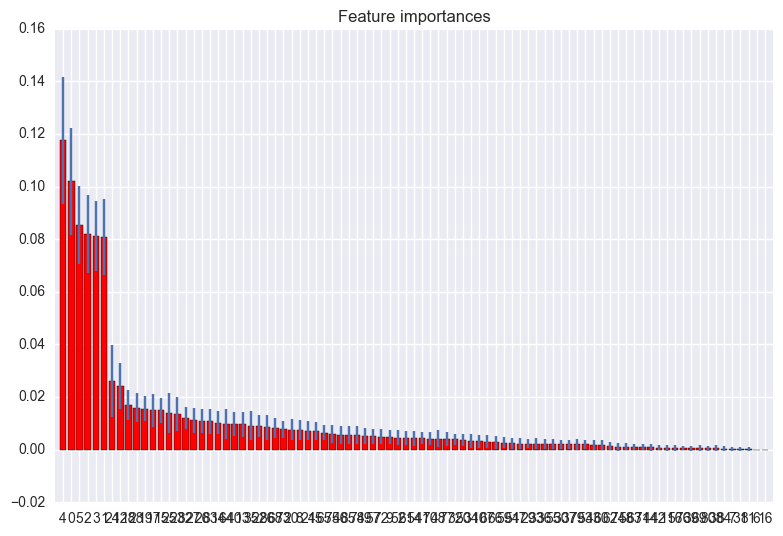

In [41]:
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## Train Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 50, random_state = 0)

#Fit Decision Tree
tree.fit(X_train, y_train)

# Predict with Decision Tree
tree_predict = tree.predict(X_test)
tree_predict_proba = tree.predict_proba(X_test).dot([0,1,2])

# Add outcomes to dataframe
df_outcomes['Patient_experience_Tree_predicted'] = tree_predict
df_outcomes['Patient_experience_Tree_proba'] = tree_predict_proba

## Train SVM

In [43]:
from sklearn import svm
clf = svm.SVC(C=200.0, kernel = 'linear', gamma = 5, probability = True)

clf.fit(X_train, y_train)

SVC(C=200.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=5, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predict with SVM

In [44]:
svm_predict = clf.predict(X_test)

svm_predict_proba = clf.predict_proba(X_test).dot([0,1,2])

df_outcomes['Patient_experience_SVM_predicted'] = svm_predict

df_outcomes['Patient_experience_SVM_proba'] = svm_predict_proba

from sklearn.cross_validation import cross_val_score

clf_2 = svm.SVC()

scores = cross_val_score(cross_val_score, X_train, y_train)
scores

clf_score_predictions =  clf.cross_val_score(X_test)

df_outcomes['Patient_experience_SVM_score'] = clf_score_predictions

clf_svr = svm.SVR()
clf_svr.fit(X_train, y_train)
clf_svr_predict = clf_svr.predict(X_test)
df_outcomes['Patient_experience_SVM_SVR_predicted'] = clf_svr_predict

## Test  Accuracy

In [45]:
from sklearn.metrics import accuracy_score

## Test Logistic Regression Accuracy
lr_accuracy = accuracy_score(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_lr_predicted'], normalize=True, sample_weight=None)

## Test KNN Accuracy
KNN_accuracy = accuracy_score(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_KNN_predicted'], normalize=True, sample_weight=None)

## Test Decision Tree Accuracy
tree_accuracy = accuracy_score(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_Tree_predicted'], normalize=True, sample_weight=None)

## Test SVM  Accuracy
SVM_accuracy = accuracy_score(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_SVM_predicted'], normalize=True, sample_weight=None)

# Test Random Forest Accuracy
forest_accuracy = accuracy_score(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_forest_predicted'], normalize=True, sample_weight=None)

# Test KNN Regression Accuracy
#KNN_regression_accuracy = accuracy_score(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_KNN_regression_predicted'], normalize=True, sample_weight=None)



print("Logistic regression: " + str(lr_accuracy))
print("KNN: " + str(KNN_accuracy))
print("Decision tree: " + str(tree_accuracy))
print("SVM: " + str(SVM_accuracy))

Logistic regression: 0.518853695324
KNN: 0.505279034691
Decision tree: 0.401206636501
SVM: 0.521870286576


In [46]:
model_accuracy_dict = {"Logistic Regression": lr_accuracy, "KNN": KNN_accuracy, "Decision Tree":tree_accuracy, "SVM": SVM_accuracy, "Random Forest":forest_accuracy }
model_accuracy_pd = pd.DataFrame(model_accuracy_dict.items(), columns=['Model', 'Accuracy'])

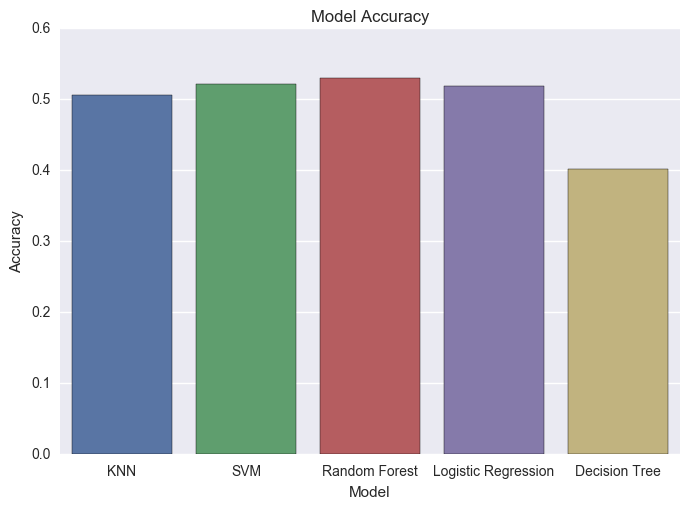

In [47]:
sns.barplot(x = "Model", y = "Accuracy", data = model_accuracy_pd)
plt.title('Model Accuracy')
plt.ylabel("Accuracy")
plt.show()

## Calculate RMSE for each model

In [48]:
from sklearn.metrics import mean_squared_error as mse

# Logistic Regression
lr_rmse = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_lr_predicted'])**1/2)
lr_rmse_proba = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_lr_proba'])**1/2)

# KNN 
knn_rmse = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_KNN_predicted'])**1/2)
knn_rmse_proba = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_KNN_proba'])**1/2)

# Decision Tree 
tree_rmse = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_Tree_predicted'])**1/2)
tree_rmse_proba = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_Tree_proba'])**1/2)

# SVM 
SVM_rmse = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_SVM_predicted'])**1/2)
SVM_rmse_proba = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_SVM_proba'])**1/2)

# Random Forest 
forest_rmse = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_forest_predicted'])**1/2)

# KNN Regression
KNN_regression_rmse = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_KNN_regression_predicted'])**1/2)

#SVM__SVR_rmse = (mse(df_outcomes['Patient_experience_actual'], df_outcomes['Patient_experience_SVM_SVR_predicted'])**1/2)

In [49]:
model_RMSE_dict = {"Logistic Regression": lr_rmse, "KNN": knn_rmse, "Decision Tree":tree_rmse, "SVM": SVM_rmse, "Random Forest":forest_rmse, "KNN Regression": KNN_regression_rmse}
model_RMSE_pd = pd.DataFrame(model_RMSE_dict.items(), columns=['Model', 'RMSE'])
model_RMSE_pd

,Model,RMSE
0,KNN,0.421569
1,SVM,0.381599
2,Decision Tree,0.509804
3,KNN Regression,0.264551
4,Logistic Regression,0.371795
5,Random Forest,0.400452


In [50]:
model_RMSE_proba_dict = {"Logistic Regression": lr_rmse_proba, "KNN": knn_rmse_proba, "Decision Tree":tree_rmse_proba, 'SVM':SVM_rmse_proba, "SVM_SVR": SVM__SVR_rmse }
model_RMSE_proba_pd = pd.DataFrame(model_RMSE_proba_dict.items(), columns=['Model', 'RMSE_proba'])
model_RMSE_proba_pd

NameError: name 'SVM__SVR_rmse' is not defined

In [ ]:
df_outcomes.head(5)

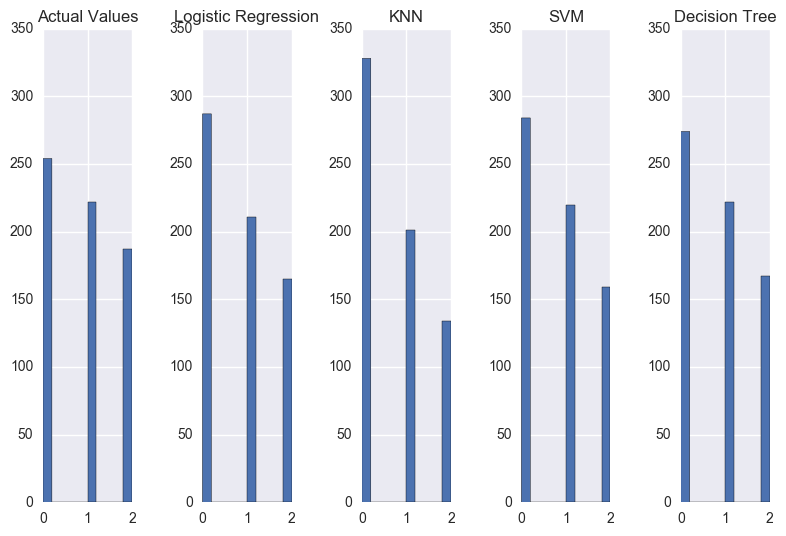

In [51]:
fig = plt.figure()

act_fig = fig.add_subplot(1,5,1)
act_fig.hist(df_outcomes.Patient_experience_actual)
act_fig.set_ylim(0,350)
act_fig.set_xticks(np.linspace(0, 2, 3))
act_fig.set_title("Actual Values")

lr_fig = fig.add_subplot(1,5,2)
lr_fig.hist(df_outcomes.Patient_experience_lr_predicted)
lr_fig.set_ylim(0,350)
lr_fig.set_xticks(np.linspace(0, 2, 3))
lr_fig.set_title("Logistic Regression")

knn_fig = fig.add_subplot(1,5,3)
knn_fig.hist(df_outcomes.Patient_experience_KNN_predicted)
knn_fig.set_ylim(0,350)
knn_fig.set_xticks(np.linspace(0, 2, 3))
knn_fig.set_title("KNN")

svm_fig = fig.add_subplot(1,5,4)
svm_fig.hist(df_outcomes.Patient_experience_SVM_predicted)
svm_fig.set_ylim(0,350)
svm_fig.set_xticks(np.linspace(0, 2, 3))
svm_fig.set_title("SVM")

tree_fig = fig.add_subplot(1,5,5)
tree_fig.hist(df_outcomes.Patient_experience_Tree_predicted)
tree_fig.set_ylim(0,350)
tree_fig.set_xticks(np.linspace(0, 2, 3))
tree_fig.set_title("Decision Tree")

plt.tight_layout()
plt.show()

## Linear Regression

In [53]:
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [54]:
lm_model_lr = lm.fit(X_train, y_train)

In [55]:
print 'Estimated intercept coefficient:', lm_model_lr.intercept_

Estimated intercept coefficient: 4.31851822651e+13


In [56]:
print 'Number of coefficients:', len(lm_model_lr.coef_)

Number of coefficients: 87


In [57]:
lm_model_lr_predicted = lm_model_lr.predict(X_test)

In [58]:
lm_model_lr_predicted[:10]

array([ 0.6796875,  1.4375   ,  0.296875 ,  1.046875 ,  1.4375   ,
        0.5703125,  1.1015625,  0.921875 ,  0.7265625,  1.671875 ])

In [59]:
df_outcomes['lm_model_lr_predicted'] = lm_model_lr_predicted

In [60]:
logistic_out = ['Patient_experience_actual','Patient_experience_lr_predicted', 'Patient_experience_lr_proba','lm_model_lr_predicted']

In [61]:
logistic_out_df = df_outcomes[logistic_out]

logistic_out_df.sort_values(['Patient_experience_actual'], ascending=False)

,Patient_experience_actual,Patient_experience_lr_predicted,Patient_experience_lr_proba,lm_model_lr_predicted
85,2,0,0.723732,0.718750
466,2,0,0.922146,1.109375
2503,2,0,0.712734,0.640625
3254,2,1,1.159603,1.054688
4199,2,0,0.702227,0.812500
4039,2,2,1.123714,1.164062
3085,2,1,1.056481,1.093750
4222,2,2,1.620088,2.820312
1139,2,1,1.190296,1.195312
102,2,0,0.515431,0.046875


In [62]:
df_outcomes[logistic_out][0:10]

,Patient_experience_actual,Patient_experience_lr_predicted,Patient_experience_lr_proba,lm_model_lr_predicted
4427,0,0,0.716565,0.679688
2280,2,2,1.544872,1.437500
3133,0,0,0.378491,0.296875
844,2,2,1.030901,1.046875
1964,1,2,1.158757,1.437500
3032,2,0,0.637888,0.570312
1422,1,1,1.189051,1.101562
819,1,0,0.936432,0.921875
4049,1,1,0.900673,0.726562
4634,2,2,1.744243,1.671875


In [63]:
df_outcomes.columns

Index([u'Number_of_Discharges_r', u'Excess_Readmission_Ratio_r',
       u'Predicted_Readmission_Rate_r', u'Expected_Readmission_Rate_r',
       u'Number_of_Readmissions_r', u'MSPB', u'Type_Acute Care Hospitals',
       u'Ownership_g_Government - Federal',
       u'Ownership_g_Government - Hospital District or Authority',
       u'Ownership_g_Government - Local', u'Ownership_g_Government - State',
       u'Ownership_g_Physician', u'Ownership_g_Proprietary',
       u'Ownership_g_Voluntary non-profit - Church',
       u'Ownership_g_Voluntary non-profit - Other',
       u'Ownership_g_Voluntary non-profit - Private', u'EHRs_g_True',
       u'Safety_of_care_g_Above the National average',
       u'Safety_of_care_g_Below the National average',
       u'Safety_of_care_g_Same as the National average',
       u'Effectiveness_of_care_g_Above the National average',
       u'Effectiveness_of_care_g_Below the National average',
       u'Effectiveness_of_care_g_Same as the National average',
       u'

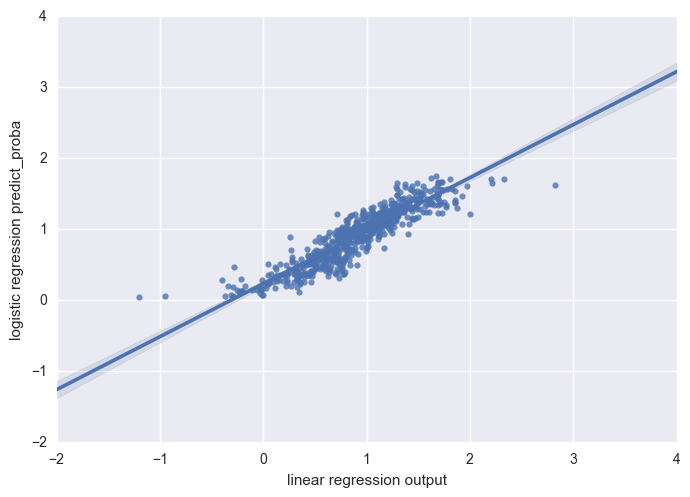

In [64]:
sns.regplot(x = lm_model_lr_predicted, y = df_outcomes['Patient_experience_lr_proba'], fit_reg = True)
plt.xlabel('linear regression output')
plt.ylabel('logistic regression predict_proba')
plt.show()

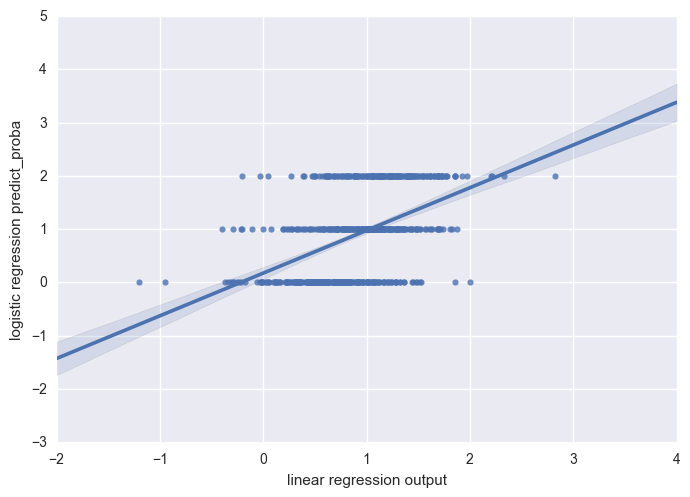

In [65]:
sns.regplot(x = lm_model_lr_predicted, y = df_outcomes['Patient_experience_actual'], fit_reg = True)
plt.xlabel('linear regression output')
plt.ylabel('logistic regression predict_proba')
plt.show()

In [66]:
## Test sensitivity

true_positive_filter = (df_outcomes['Patient_experience_Tree_predicted'] == 1) & (df_outcomes['Patient_experience_actual'] == 1)

true_positives = len(df_outcomes[true_positive_filter])

false_negative_filter = (df_outcomes['Patient_experience_Tree_predicted'] == 0) & (df_outcomes['Patient_experience_actual'] == 1)

false_negatives = len(df_outcomes[false_negative_filter])

sensitivity = float(true_positives) / float(true_positives + false_negatives)
print('Model sensitivity is ' + str(sensitivity))

Model sensitivity is 0.443037974684


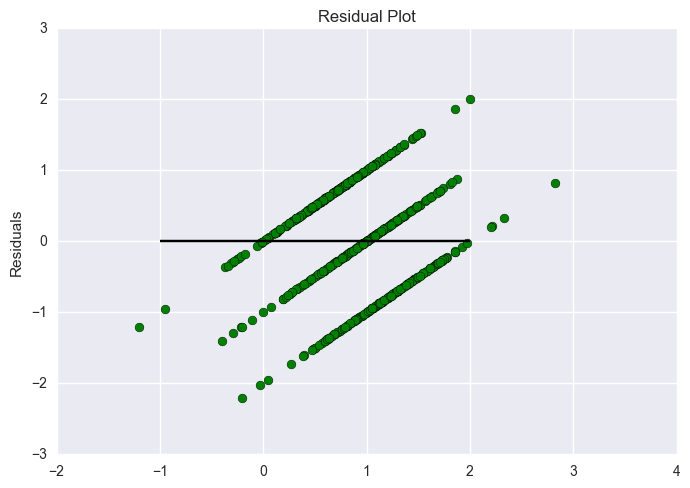

In [74]:
plt.scatter(lm_model_lr_predicted, (lm_model_lr_predicted - df_outcomes['Patient_experience_actual']), c='g', s=40)
plt.hlines(y = 0, xmin=-1, xmax = 2)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.show()